# **1.Importing The Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **2.Loading The Dataset**

In [2]:
df = pd.read_csv("/content/bestsellers with categories.csv")

In [3]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


# **3.Data Prepartion and Cleaning**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [5]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


It is clear from the above table that maximum price of a book is 105$ and maximum rating is 4.9


In [7]:
df.shape

(550, 7)

In [8]:
r,c = df.shape
print(f"The dataset has {r} rows and {c} columns.")

The dataset has 550 rows and 7 columns.


In [ ]:
# To rename the columns and make it easy to use:

df.columns=['name','authour','user_rating','reviews','price','year','genre']

In [9]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


# **3.B. Checking For Null Values**

In [10]:
# To check if there is any null value in the data
df.isnull().any()

,0
Name,False
Author,False
User Rating,False
Reviews,False
Price,False
Year,False
Genre,False


In [11]:
df.isnull().sum()

,0
Name,0
Author,0
User Rating,0
Reviews,0
Price,0
Year,0
Genre,0


In [18]:
# For Total Number of differnt books
len(df.Name.unique())

351

In [21]:
df['Estimated_profit'] = df.Reviews*df.Price

# **4. Exploratory Analysis and Visualization**

In [ ]:
# setting the background to be dark, it looks cool with this ;)

sns.set(style="darkgrid")
plt.rcParams['font.size'] =14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

# **1-Which genre has the most books in this category and their distribution?**

In [22]:
fiction_df_values = df[df.Genre == 'Fiction']
len(fiction_df_values)

240

In [23]:
Nfiction_df= df[df.Genre == 'Non Fiction']
len(Nfiction_df)

310

In [25]:
Genre_dist = df.Genre.value_counts()
Genre_dist


,count
Genre,
Non Fiction,310
Fiction,240


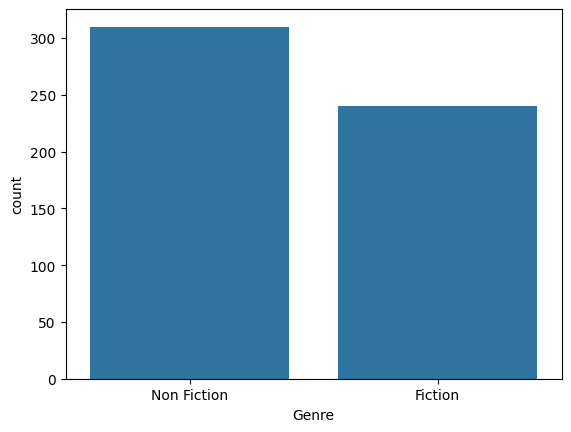

In [30]:
sns.barplot(x=Genre_dist.index,y=Genre_dist);

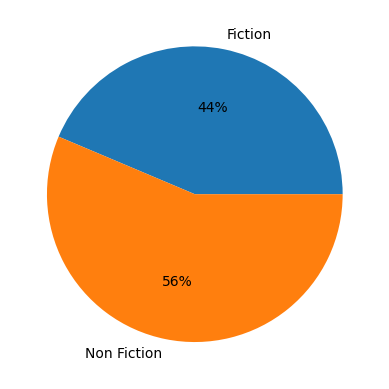

In [31]:
plt.pie([240,310],labels=['Fiction','Non Fiction'],autopct='%.0f%%');



* Non Fiction books are in majority in top selling category.




### **User Ratings Overview:**



*  What is the average rating of each genre?




In [36]:
df.groupby('Genre')['User Rating'].mean()

,User Rating
Genre,
Fiction,4.648333
Non Fiction,4.595161


Text(0.5, 0, 'Rating')

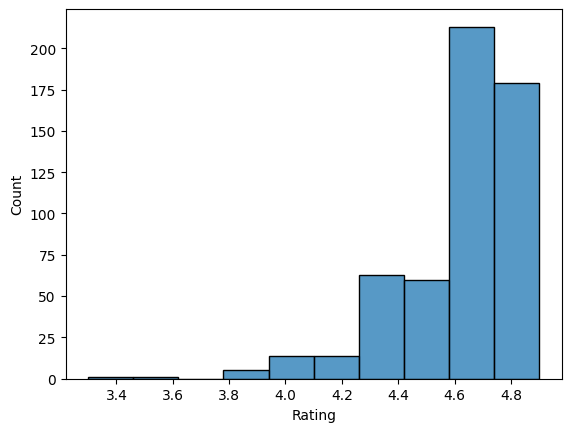

In [38]:
sns.histplot(data=df['User Rating'],bins=10)
plt.xlabel('Rating')

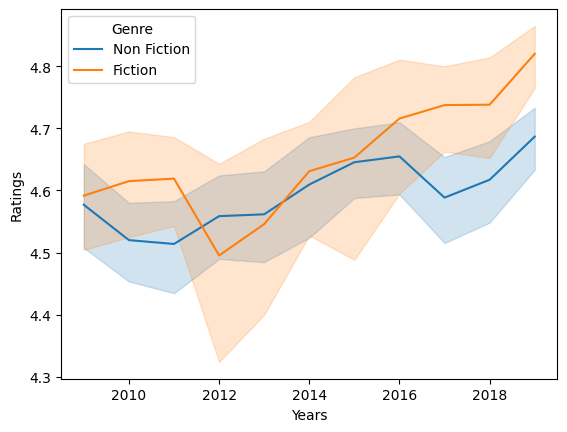

In [40]:
sns.lineplot(y=df['User Rating'],x=df.Year,hue=df.Genre);
plt.ylabel("Ratings")
plt.xlabel("Years");




*  It is clear from the above graph that most of the books received ratings between 4.5 to 4.9.




# **Relationship between ratings and price**

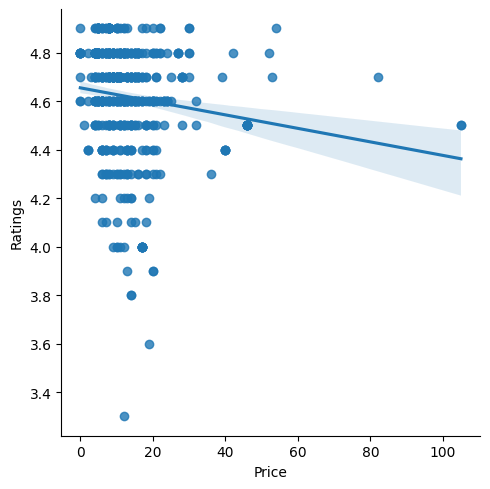

In [43]:
sns.lmplot(y='User Rating', x='Price', data=df);
plt.ylabel('Ratings')
plt.xlabel('Price');

**As price increases, rating goes down.**

# **To get an overview of how much books have earned yearly.**

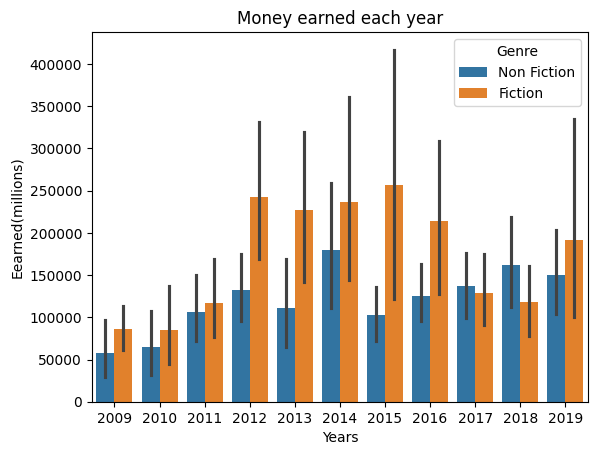

In [44]:
sns.barplot(x=df.Year,y=df.Estimated_profit,hue=df.Genre)
plt.xlabel('Years')
plt.ylabel("Eearned(millions)")
plt.title('Money earned each year');



* Above graph above shows the earning of these top books ,in most cases, are below 0.8 million.




## **Average Profit earned by each book depending on its genre**

In [46]:
genre_average=df.groupby(['Genre'])['Estimated_profit'].mean()

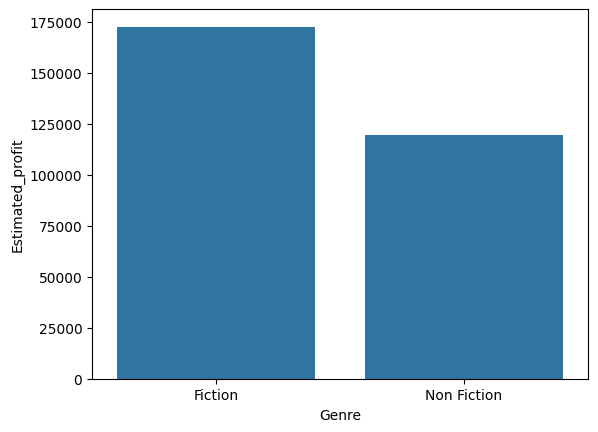

In [47]:
sns.barplot(x=genre_average.index,y=genre_average);

# **Q1: TOP 10 Books which earned the most ?**

In [48]:
rich_df=df.groupby('Name')['Estimated_profit'].max()
rich_df=rich_df.sort_values(ascending=False).head(10)
rich_df

,Estimated_profit
Name,
The Girl on the Train,1430028
The Alchemist,1396161
Where the Crawdads Sing,1317615
"Diagnostic and Statistical Manual of Mental Disorders, 5th Edition: DSM-5",701295
Harry Potter Paperback Box Set (Books 1-7),700492
The Goldfinch: A Novel (Pulitzer Prize for Fiction),676880
Becoming,672463
Fifty Shades of Grey: Book One of the Fifty Shades Trilogy (Fifty Shades of Grey Series),661710
The Fault in Our Stars,656266


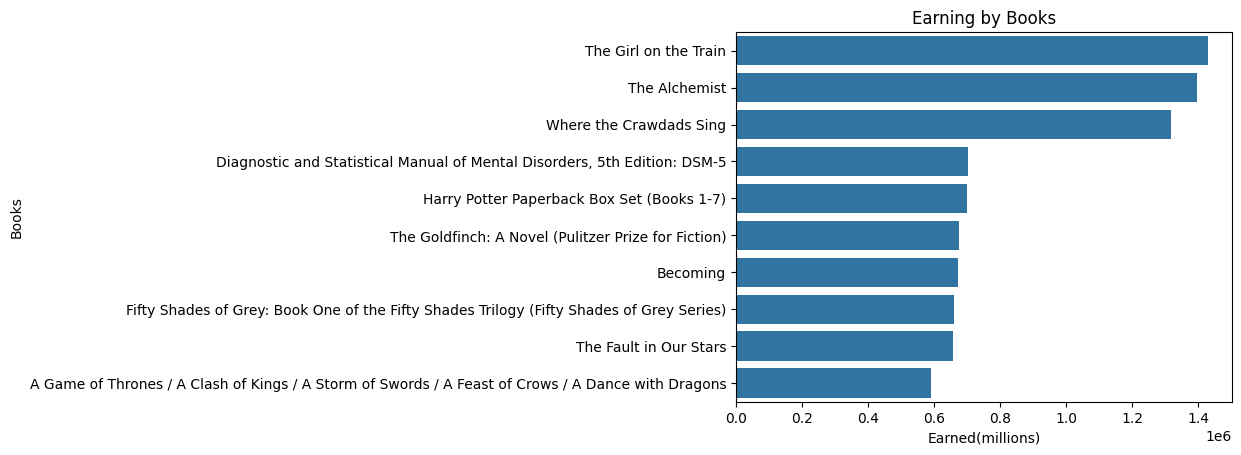

In [49]:
sns.barplot(x=rich_df,y=rich_df.index)
plt.xlabel("Earned(millions)")
plt.ylabel("Books")
plt.title('Earning by Books');

# **Q2: Books which earned the most per year (2009-19)**

In [50]:
most_earning_book_per_year=df[df.groupby('Year')['Estimated_profit'].transform(max) == df['Estimated_profit']]
most_earning_book_per_year

<ipython-input-50-51d55d408d3f>:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  most_earning_book_per_year=df[df.groupby('Year')['Estimated_profit'].transform(max) == df['Estimated_profit']]


,Name,Author,User Rating,Reviews,Price,Year,Genre,Estimated_profit
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction,672463
69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2013,Non Fiction,701295
106,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,2012,Fiction,661710
159,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,4.8,13471,52,2016,Fiction,700492
265,Player's Handbook (Dungeons & Dragons),Wizards RPG Team,4.8,16990,27,2017,Fiction,458730
271,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2009,Non Fiction,394680
338,The Alchemist,Paulo Coelho,4.7,35799,39,2014,Fiction,1396161
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction,1430028
410,The Hunger Games Trilogy Boxed Set (1),Suzanne Collins,4.8,16949,30,2011,Fiction,508470
515,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,16,2010,Non Fiction,474768


In [52]:
most_earning_book_per_year=most_earning_book_per_year.sort_values('Year').set_index('Year')

In [53]:
most_earning_book_per_year

,Name,Author,User Rating,Reviews,Price,Genre,Estimated_profit
Year,,,,,,,
2009,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,Non Fiction,394680
2010,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,16,Non Fiction,474768
2011,The Hunger Games Trilogy Boxed Set (1),Suzanne Collins,4.8,16949,30,Fiction,508470
2012,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,Fiction,661710
2013,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,Non Fiction,701295
2014,The Alchemist,Paulo Coelho,4.7,35799,39,Fiction,1396161
2015,The Girl on the Train,Paula Hawkins,4.1,79446,18,Fiction,1430028
2016,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,4.8,13471,52,Fiction,700492
2017,Player's Handbook (Dungeons & Dragons),Wizards RPG Team,4.8,16990,27,Fiction,458730




* **What is the average earning of each genre on per year basis.**




In [54]:
genres_per_year_mean=df.groupby(['Year','Genre'])['Estimated_profit'].mean().round(2)

In [56]:
pd.DataFrame(genres_per_year_mean)

Estimated_profit
Year Genre                        
2009 Fiction              85776.79
     Non Fiction          58024.58
2010 Fiction              84522.00
     Non Fiction          64335.63
2011 Fiction             117434.67
     Non Fiction         106295.21
2012 Fiction             242780.67
     Non Fiction         132104.31
2013 Fiction             226853.71
     Non Fiction         110657.31
2014 Fiction             236487.86
     Non Fiction         179397.71
2015 Fiction             256752.82
     Non Fiction         102435.36
2016 Fiction             213931.84
     Non Fiction         125381.45
2017 Fiction             129188.17
     Non Fiction         137256.88
2018 Fiction             117636.00
     Non Fiction         162524.79
2019 Fiction             191812.50
     Non Fiction         150023.50

# **Q4: Trend of books selling (Top rated) over the years**

In [57]:
Earning_Graph=df.groupby('Year')['Estimated_profit'].sum()

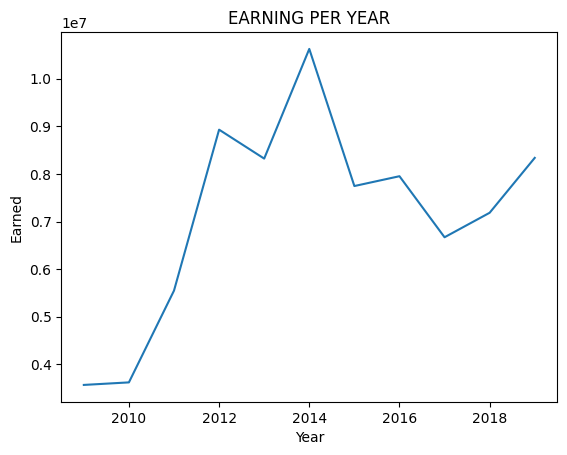

<Figure size 1200x1200 with 0 Axes>

In [58]:
sns.lineplot(data=Earning_Graph)
plt.xlabel('Year')
plt.ylabel("Earned")
plt.title("EARNING PER YEAR")
plt.figure(figsize=(12,12));

# **Q5: Top 5 authors which earned the most.**

In [59]:
authors=df.groupby('Author')['Estimated_profit'].sum()

In [60]:
authors=authors.sort_values(ascending=False).head(10)
authors

,Estimated_profit
Author,
American Psychological Association,3946800
Suzanne Collins,3368646
E L James,2517303
John Green,2381609
Laura Hillenbrand,2284821
Paula Hawkins,1986150
Gillian Flynn,1660859
Gary Chapman,1516167
Dr. Seuss,1423598


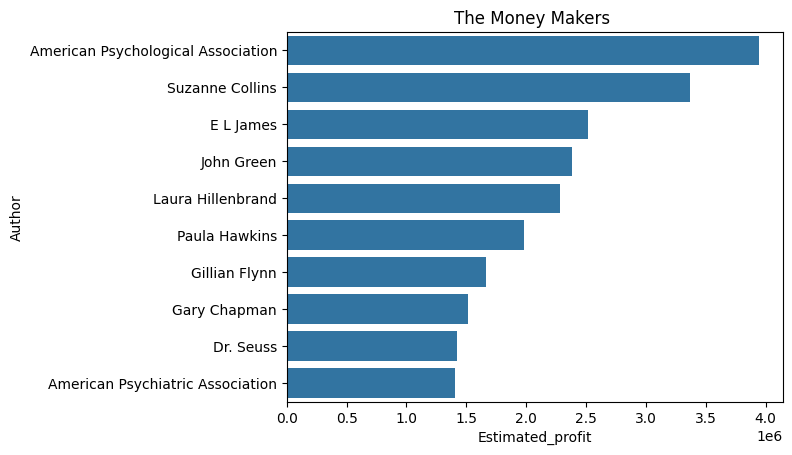

In [61]:
sns.barplot(y=authors.index,x=authors)
plt.title('The Money Makers ');